Итерации нахождения минимума с начальным приближением в точке x = [ 0.5 -1.5] и epsilon = 1e-05
iter 0: x = [ 0.5 -1.5], f = 10.25
iter 1: x = [ 0.05315822 -1.03377111], f = 1.35973863926333
iter 2: x = [-0.89042836 -0.73609415], f = -0.8715497930433315
iter 3: x = [-0.77336812 -0.52697002], f = -1.395662719029239
iter 4: x = [-0.7580049  -0.42825138], f = -1.4414823218349575
iter 5: x = [-0.75915893 -0.40628158], f = -1.4428288661314872
iter 6: x = [-0.75922462 -0.40532711], f = -1.442831136692052
iter 7: x = [-0.75922474 -0.40532538], f = -1.4428311366995041

Итерации нахождения минимума с начальным приближением в точке x = [ 1.  -0.1] и epsilon = 1e-05
iter 0: x = [ 1.  -0.1], f = 2.9102
iter 1: x = [ 0.48433764 -0.54565399], f = 0.7251909312734537
iter 2: x = [-0.33244146 -0.58606657], f = -0.9648267681593721
iter 3: x = [-1.20438585 -0.4183687 ], f = -0.40789378915897384
iter 4: x = [-0.90279235 -0.39137784], f = -1.3609117706199236
iter 5: x = [-0.78039846 -0.40182036], f = -1.44

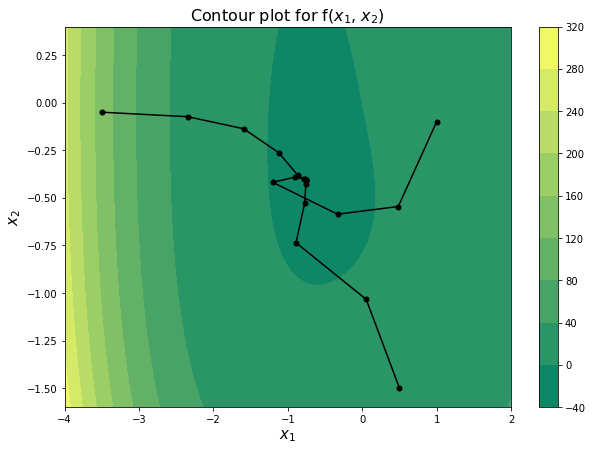

In [11]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return x[0] ** 4 + 2 * x[1] ** 4 + x[0] ** 2 * x[1] ** 2 + 2 * x[0] + x[1]

# f'(x)
def f_grad(x):
    return np.array([4 * x[0] ** 3 + 2 * x[0] * x[1] ** 2 + 2, 
                     8 * x[1] ** 3 + 2 * x[0] ** 2 * x[1] + 1])

# f''(x)
def f_hess(x):
    return np.array([[12 * x[0] ** 2 + 2 * x[1] ** 2,
                      4 * x[1] * x[0]],
                     [4 * x[0] * x[1],
                      24 * x[1] ** 2 + 2 * x[0] ** 2]])

def Newton(f, x0, epsilon):
    # возвращает массив иксов и массив значений функции на всех итерациях
    
    x1 = x0 - np.dot(np.linalg.inv(f_hess(x0)), f_grad(x0))
    f0 = f(x0)
    f1 = f(x1)
    
    x_min_arr = np.vstack([x0, x1])
    f_min_arr = np.array([f0, f1])
    
    while np.linalg.norm(x0 - x1) > epsilon:
        x0 = x1
        x1 = x0 - np.dot(np.linalg.inv(f_hess(x0)), f_grad(x0))
        f0 = f(x0)
        f1 = f(x1)
        x_min_arr = np.vstack([x_min_arr, x1])
        f_min_arr = np.append(f_min_arr, f1)
        
    return x_min_arr, f_min_arr  

x0 = np.array([[0.5, -1.5], [1, -0.1], [-3.5, -0.05]])   # начальные приближения
epsilon = 0.00001

xx = np.linspace(-4, 2, 100)
yy = np.linspace(-1.6, 0.4, 100)

X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])

plt.figure(figsize=(10, 7))
plt.contourf(X, Y, Z, cmap='summer')
plt.colorbar()
plt.title('Contour plot for f($x_{1}$, $x_{2}$)', fontsize=16)
plt.xlabel('$x_{1}$', fontsize=15)
plt.ylabel('$x_{2}$', fontsize=15)

for init_appr in x0:
    x_min_arr, f_min_arr = Newton(f, init_appr, epsilon)
    plt.plot(x_min_arr[:, 0], x_min_arr[:, 1], 'ko-', markersize=5)
    print(f'Итерации нахождения минимума с начальным приближением в точке x = {init_appr} и epsilon = {epsilon}')
    for i in range(x_min_arr.shape[0]):
        print(f'iter {i}: x = {x_min_arr[i]}, f = {f_min_arr[i]}')
    print()

